In [44]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "99"

In [45]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7608437884174308297,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5062665184
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9448529162961136886
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:02:00.0, compute capability: 6.1"]

In [42]:
print([len(train_features[0])])
#model = keras.Sequential([
#   Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
#   Dense(1)
#])

def build_model():    
    model = keras.Sequential([
        Conv2D(20, 2, padding='same', input_shape=[len(train_features[0])], activation='relu'),
        Conv2D(20, 2, activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='softmax'),
    ])

    model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

[13]


In [43]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=4000, verbose=0, 
                    validation_split = 0.1, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

ValueError: Input 0 of layer conv2d_2 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 13)

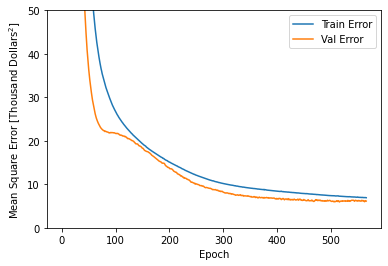

In [37]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()